***Assignment 2***
-----

***Submitted by Rahul Raju Pattar***

*Use data from Assignment-1 and write a function for calculating VaR using
Historical Simulation.*


**Discussion:**

Historical VaR is a better and simple methodology to use if one cannot determine the distribution of the asset return series. The method is only as strong as the number of data points available to measure and collecting this data back in time may prove cumbersome or even impossible. In theory this method would be better than parametric VaR if one had enough data to fully represent all of the crisis events and changing business cycles that occurred.

**The main assumptions in calculating historical VaR are**:\

**1.** The past will exactly replicate the future.\
**2.** All the past data has been fully incorporated in the risk calculation without the forced assumption of a normal distribution and that no variance-covariance matrix is needed to calculate the portfolio standard deviation. 

**In the following, the main procedure for the calculating VaR using historical simulations of the portfolio consisting of the given stocks is outlined**:

**Step 1.** Firslty, download the stocks historical data from Yahoo finance. We rank all of the past historical returns in terms of lowest to highest and compute with a predetermined confidence rate what your lowest return historically has been.  \
**Step 2.** We determine our risk position with a degree of confidence (99%) from the distribution of the returns.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

***STEP 1***
--------

In [2]:
end_date        = dt.datetime(2019,10,1)
time_difference = dt.timedelta(days = 500)
start_date      = end_date - time_difference
#print(start_date)

In [3]:
stocks_list = ['DLF.NS','NTPC.NS','HDFCBANK.NS']
weights = [0.4,0.2,0.4]

In [4]:
confidence = 99

In [5]:
def Historical_Var(stocks_list,start_date, end_date, weights, confidence):
    
    #Download the Stock prices from yfinance and remove the missing rows
    full_data = yf.download(stocks_list, start = start_date, end = end_date)
    data = full_data.copy(deep=True)
    data = data['Adj Close'].dropna()
    
    #Calculate the daily returns for each of stocks
    returns = np.log(data).diff()
    returns = returns[stocks_list]
    returns = returns.dropna()
    
    #Calculate the daily returns for the portfolio
    Portfolio_Returns = np.sum(weights*returns, axis = 1)
    Portfolio_Returns.name = 'Portfolio_Returns'
    df = Portfolio_Returns.to_frame()
    df = df.sort_values(by='Portfolio_Returns')
    
    #Calculate the Histrorical VaR and plot the histogram
    Hist_Var = df['Portfolio_Returns'].quantile(0.01)
    plt.hist(df['Portfolio_Returns']*1_000_000)
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    
    return Hist_Var
    

[*********************100%%**********************]  3 of 3 completed


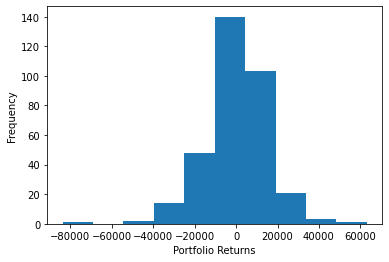

In [6]:
Hist_Var = Historical_Var(stocks_list,start_date, end_date, weights, confidence)

***STEP 2***
-----------

In [7]:
print('The 1-day {}% historical VaR is: {:.4f}'.format(confidence, Hist_Var))
print("The 1-day {}% historical VaR for an investment of 1 million in the portfolio is: {:.4f}".format(confidence, Hist_Var*1_000_000))


The 1-day 99% historical VaR is: -0.0388
The 1-day 99% historical VaR for an investment of 1 million in the portfolio is: -38773.4886
